In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia


Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
chest-xray-pneumonia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [ ]:
import os
os.listdir('chest_xray')

['__MACOSX', 'val', 'train', 'chest_xray', 'test']

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "chest_xray/train"
val_dir = "chest_xray/val"
test_dir = "chest_xray/test"

IMG_SIZE = (150, 150)
BATCH_SIZE = 32


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

In [ ]:
val_test_datagen = ImageDataGenerator(rescale=1.0/255)

In [ ]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 5216 images belonging to 2 classes.


In [ ]:
val_data = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 16 images belonging to 2 classes.


In [ ]:

test_data = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 624 images belonging to 2 classes.


In [ ]:
print("Class Indices:", train_data.class_indices)

Class Indices: {'NORMAL': 0, 'PNEUMONIA': 1}


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=15, zoom_range=0.2, shear_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load datasets
train_data = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode="categorical")
val_data = val_datagen.flow_from_directory(val_dir, target_size=(150, 150), batch_size=32, class_mode="categorical")
test_data = test_datagen.flow_from_directory(test_dir, target_size=(150, 150), batch_size=32, class_mode="categorical")


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report

# Build CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(256, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(2, activation='softmax')
])

# Compile Model with Adam optimizer
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Summary of Model
model.summary()

# Early Stopping Callback
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=5,  # Stops if no improvement after 5 epochs
    restore_best_weights=True
)

# Train Model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=25,
    callbacks=[early_stopping]
)




/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 148, 148, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 72, 72, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 34, 34, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 15, 15, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 15, 15, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,945,218 (26.49 MB)

 Trainable params: 6,944,258 (26.49 MB)

 Non-trainable params: 960 (3.75 KB)

Epoch 1/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 77s 427ms/step - accuracy: 0.8380 - loss: 0.5361 - val_accuracy: 0.5000 - val_loss: 9.5752
Epoch 2/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 69s 423ms/step - accuracy: 0.9099 - loss: 0.2466 - val_accuracy: 0.5000 - val_loss: 11.1947
Epoch 3/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 68s 418ms/step - accuracy: 0.9259 - loss: 0.2013 - val_accuracy: 0.5000 - val_loss: 4.2308
Epoch 4/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 69s 423ms/step - accuracy: 0.9342 - loss: 0.1800 - val_accuracy: 0.6250 - val_loss: 2.2502
Epoch 5/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 83s 429ms/step - accuracy: 0.9343 - loss: 0.1661 - val_accuracy: 0.6875 - val_loss: 0.9126
Epoch 6/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 69s 421ms/step - accuracy: 0.9433 - loss: 0.1533 - val_accuracy: 0.6875 - val_loss: 0.9093
Epoch 7/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 68s 417ms/step - accuracy: 0.9466 - loss: 0.1502 - val_accuracy: 0.6875 - val_loss: 0.5598
Epoch 8/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 68s 420ms/step - accuracy: 0.9471 - loss: 

In [ ]:
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 211ms/step - accuracy: 0.9038 - loss: 0.2388
Test Accuracy: 91.03%


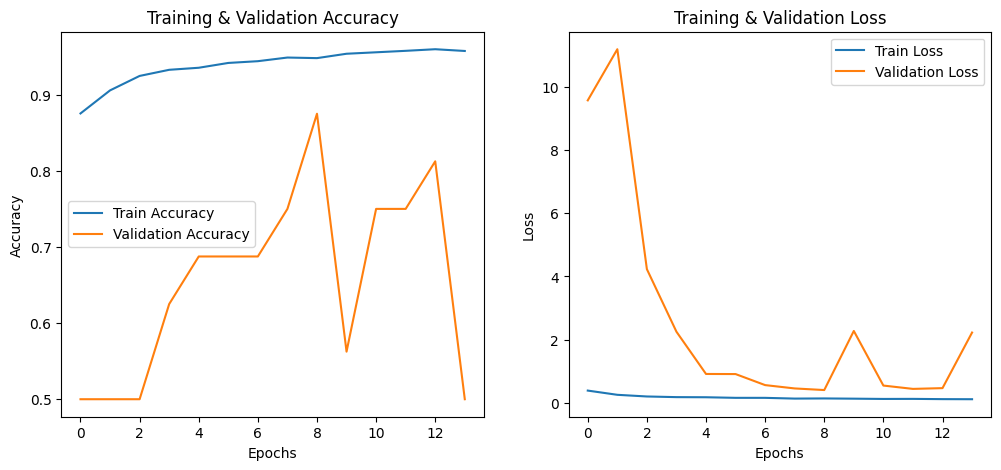

In [ ]:
# Function to Plot Training History
def plot_training(history):
    plt.figure(figsize=(12, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training & Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training & Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Call Function
plot_training(history)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step


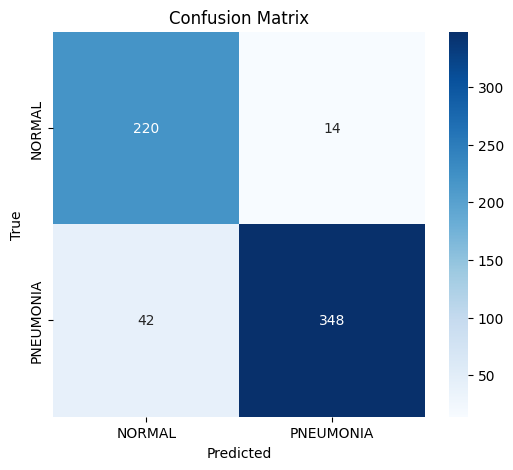


🔍 Classification Report:

              precision    recall  f1-score   support

      NORMAL       0.84      0.94      0.89       234
   PNEUMONIA       0.96      0.89      0.93       390

    accuracy                           0.91       624
   macro avg       0.90      0.92      0.91       624
weighted avg       0.92      0.91      0.91       624



In [ ]:
# Get True Labels & Predictions
y_true = []
y_pred = []

for images, labels in test_data:
    preds = model.predict(images)
    y_true.extend(np.argmax(labels, axis=1))
    y_pred.extend(np.argmax(preds, axis=1))
    if len(y_true) >= test_data.samples:
        break

# Compute Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
class_labels = list(train_data.class_indices.keys())

# Plot Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print Classification Report
print("\n🔍 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


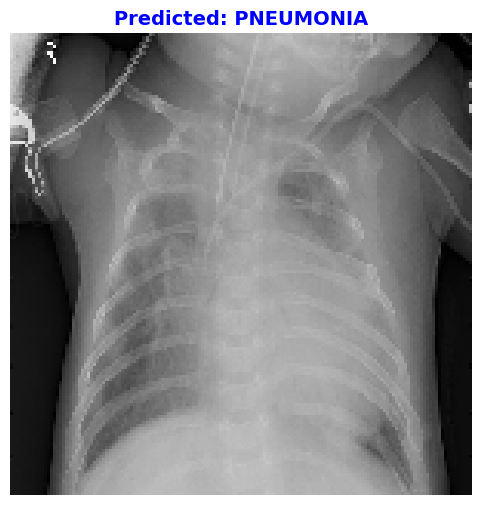

Prediction Probabilities: [[9.604471e-04 9.990395e-01]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Define Image Path
img_path = "chest_xray/test/PNEUMONIA/person1_virus_6.jpeg"  # Change to a valid test image path

# Load and Preprocess Image
img = image.load_img(img_path, target_size=(150, 150))  # Resize to match model input size
img_array = image.img_to_array(img) / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions for model input

# Predict Class
prediction = model.predict(img_array)
labels = list(train_data.class_indices.keys())  # Get class labels
predicted_label = labels[np.argmax(prediction)]  # Get predicted class

# Display Image with Prediction
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis("off")
plt.title(f"Predicted: {predicted_label}", fontsize=14, fontweight="bold", color="blue")
plt.show()
print(f"Prediction Probabilities: {prediction}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


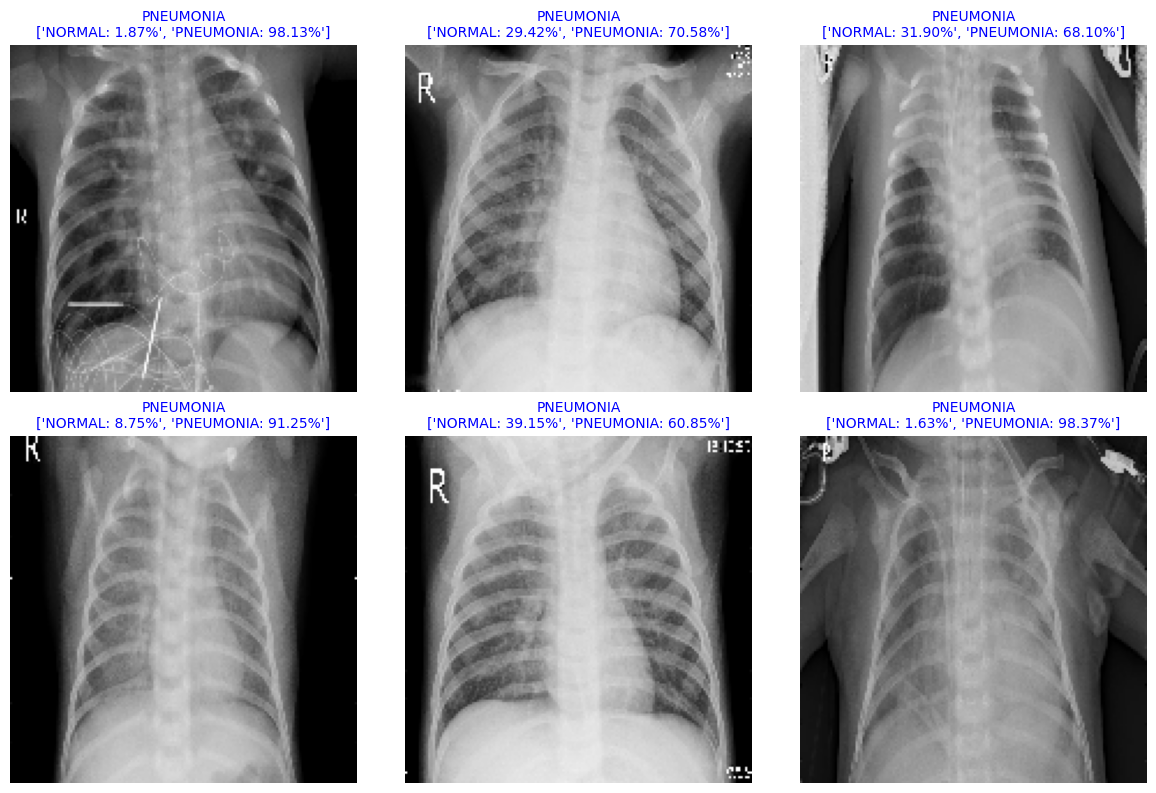

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import os

# Path to test images folder (Change this to your test folder)
test_folder = "chest_xray/test/PNEUMONIA"  # Change to test/NORMAL or test/PNEUMONIA as needed

# Get list of image filenames (limit to first 6 images for display)
image_filenames = [f for f in os.listdir(test_folder) if f.endswith('.jpeg')][:6]

# Set figure size
plt.figure(figsize=(12, 8))

# Loop through selected images
for i, img_name in enumerate(image_filenames):
    img_path = os.path.join(test_folder, img_name)

    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(150, 150))  # Resize
    img_array = image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions for model input

    # Predict the class
    prediction = model.predict(img_array)[0]  # Get probabilities
    labels = list(train_data.class_indices.keys())  # Get class names
    predicted_label = labels[np.argmax(prediction)]  # Get predicted class

    # Display image
    plt.subplot(2, 3, i + 1)  # Create a 2-row, 3-column grid
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"{predicted_label}\n{[f'{label}: {prob:.2%}' for label, prob in zip(labels, prediction)]}",
              fontsize=10, color="blue")

# Show the full grid of images
plt.tight_layout()
plt.show()


In [ ]:
model.save("chest_xray_model.h5")


In [ ]:
from tensorflow.keras.models import load_model

model = load_model("chest_xray_model.h5")
